#### Building k-NN model steps
1. Generate training data
2. Create k-NN object for a given number k
3. Find the k nearest neighbors of a new data point that we want to classify
4. Assign class label of the new data point by majority vote
5. Plot result

In [3]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('ggplot')

#### 1. Generating the training data

Fix the seed

In [5]:
np.random.seed(42)

Assume town map spans range 0 <= x < 100 and 0 <= y < 100.   
Create function that generates random data points on map

In [6]:
def generate_data(num_samples, 
                    num_features = 2, 
                    low = 0, 
                    high = 100):
    data_size = (num_samples, num_features)
    data = np.random.randint(low, high, data_size)
    
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, labels_size)
    
    return data.astype(np.float32), labels

In [7]:
train_data, labels = generate_data(10)
print('Training data: ', train_data)
print('Training labels: ', labels)

Training data:  [[ 51.  92.]
 [ 14.  71.]
 [ 60.  20.]
 [ 82.  86.]
 [ 74.  74.]
 [ 87.  99.]
 [ 23.   2.]
 [ 21.  52.]
 [  1.  87.]
 [ 29.  37.]]
Training labels:  [[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


Plot data

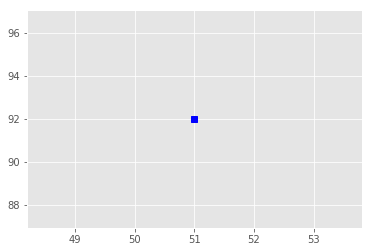

In [8]:
plt.plot(train_data[0,0], train_data[0,1], 'bs')

Write function to visualize entire training set (blue squares and red triangles)

In [9]:
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:,0], all_blue[:,1], c='b', marker='s', s=100)
    plt.scatter(all_red[:,0], all_red[:,1], c='r', marker='v', s=100)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

Test the function using the dataset

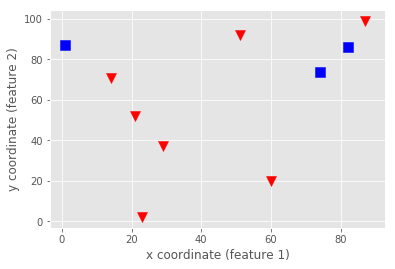

In [10]:
all_blue = train_data[labels.ravel() == 0]
all_red = train_data[labels.ravel() == 1]
plot_data(all_blue, all_red)

#### Training the classifier

In [14]:
knn = cv2.ml.KNearest_create()
# Provide knn training data, tell knn each row is a data point, provide labels
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

Generate new data point to add to map

In [16]:
newcomer, _ = generate_data(1)
print('New data: ', newcomer)

New data:  [[ 58.  41.]]


Add new data point to the map

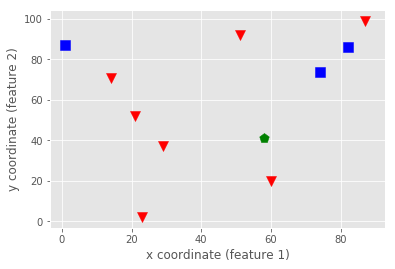

In [18]:
plot_data(all_blue, all_red)
plt.scatter(newcomer[:,0], newcomer[:,1], c='g', marker='p', s=100)

Use OpenCV k-NN to predict label for new data point

In [19]:
rev, results, neighbor, dist = knn.findNearest(newcomer, 4)
print('Predicted label: ', results)
print('Nearest neighbors: ', neighbor)
print('Distance to neighbor: ', dist)

Predicted label:  [[ 1.]]
Nearest neighbors:  [[ 1.  1.  0.  1.]]
Distance to neighbor:  [[  445.   857.  1345.  1490.]]
